# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$w_{new} = w_{old} - \alpha \nabla L(w)$$

$$L(w) =  \frac{1}{n}\left[\sum_i (\langle x_{i},w_{old} \rangle - y_i) ^ 2 \right] + \frac{1}{C}R(w) $$

$$\nabla L(w) =  \frac{2}{n} \sum_{i=1}^n(\langle x_{i},w_{old} \rangle - y_{i})x_{i} + \frac{2}{C}w_{old}$$

$$w_{new} =  w_{old} - \alpha \left[ \frac{2}{n} \sum_{i=1}^n(\langle x_{i},w_{old} \rangle - y_{i})x_{i} + \frac{2}{C}w_{old}\right] $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$w_{new} = w_{old} - \alpha \nabla L(w)$$

$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log \sigma (\langle x_{i},w_{old} \rangle) + ( 1 - y_i) \log (1 - \sigma (\langle x_{i},w_{old} \rangle)) \right] +  \frac{1}{C}R(w)$$

$$\nabla L(w) = - \frac{1}{n}\left[\sum_i x_{i} \left[y_{i}\frac{1}{\sigma (\langle x_{i},w_{old} \rangle)}\sigma (\langle x_{i},w_{old} \rangle) (1 - \sigma (\langle x_{i},w_{old} \rangle)) - (1 - y_i) \frac{1}{1 - \sigma (\langle x_{i},w_{old} \rangle)}\sigma (\langle x_{i},w_{old} \rangle))(1 - \sigma (\langle x_{i},w_{old} \rangle))\right] \right] + \frac{1}{C}\nabla R(w)$$


$$\nabla L(w) = - \frac{1}{n}\left[\sum_i x_{i} (y_i - \sigma(\langle x_{i},w_{old} \rangle)\right] +  \frac{1}{C}\nabla R(w)$$

$$R(w) =  \sum_{j=1}^{D}w_j^2$$

$$w_{new} =  w_{old} - \alpha \left[ - \frac{1}{n}\sum_i x_{i} (y_i - \sigma(\langle x_{i},w_{old} \rangle) + \frac{2}{C}w_{old}\right] $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$ H_{i,j} = \frac{\partial^2L(w)}{\partial w_{i}\partial w_{j}} $$

$$L(w) =  \frac{1}{n}\left[\sum_i (\langle x_{i},w \rangle - y_i) ^ 2 \right] $$

В матричном виде:

$$ L(w) = \frac{1}{n} (Xw - y)^T(Xw - y) + \frac{1}{C}w^Tw = \frac{1}{n} (w^TX^TXw - w^TX^Ty - y^TXw + y^Ty)$$


$$ \nabla L(w) = \frac{1}{n} (X^TX + X^TX)w - 2X^Ty + \frac{1}{C}(I^T + I)w = \frac{2}{n} (X^TXw - X^Ty)$$

$$ \nabla^2 L(w) = \frac{2}{n} X^TX$$

$$ \forall z: z^T (X^TX)(X^TX)^T z = \left[(X^TX)^Tx\right]^T \left[(X^TX)^Tx\right] > 0$$

Следовательно точка минимума!

Найдем точное решение:

$$ L(w) = \frac{2}{n} (X^TXw - 2X^Ty) + \frac{2}{C}w$$

$$ X^TXw - X^Ty + \frac{n}{C}w = 0 $$

$$ (X^TX + \frac{n}{C} I)w = X^Ty$$

$$ w = (X^TX + \frac{n}{C} I)^{-1}X^Ty $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Воспользуемся необходимым условием экстремума:

$$ \frac{\partial E(L|x_i)}{\partial a} = -p(y_i = 1|x_i)\frac{1}{a(x_i)} + p(y_i = 0|x_i) \frac{1}{1 - a(x_i)} = 0$$

$$ p(y_i = 1|x_i)\frac{1}{a(x_i)} = (1 - p(y_i = 1|x_i))\frac{1}{1 - a(x_i)}$$

$$ p(y_i = 1|x_i)(1 - a(x_i)) = a(x_i)(1 - p(y_i = 1|x_i)) $$

$$ p(y_i = 1|x_i) = a(x_i) $$


Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Свободный член вводится для сдвига всего признакового пространства. Параметры смещений не влияют на "кривизну" модели, поэтому в регуляризации их можно опустить. 

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
import sklearn.utils
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = sklearn.utils.shuffle(X, y)
    else:
        X, y = X.copy(), y.copy()

    for i in range((len(X) - batch_size) // batch_size):
        X_batch = X[i * batch_size : (i + 1) * batch_size]
        y_batch = y[i * batch_size : (i + 1) * batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [7]:
#%%pycodestyle
import numpy as np
np.seterr(all='ignore')
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=100,
                 alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = np.mean((y_batch - self.__predict(X_batch)) ** 2) +\
                    np.dot(self.weights, self.weights) / self.C
        elif self.model_type == 'log_reg':
            loss = -np.mean(y_batch * np.log(self.__predict(X_batch)) +\
                    (1 - y_batch) * np.log(1 - self.__predict(X_batch))) +\
                    np.dot(self.weights, self.weights) / self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        grad = np.zeros(X_batch.shape[1])
        if self.model_type == 'lin_reg':
            for i in range(self.batch_size):
                grad += (self.__predict(X_batch[i]) - y_batch[i]) * X_batch[i]
            loss_grad = 2 * grad / self.batch_size + 2 * self.weights / self.C
        elif self.model_type == 'log_reg':
            for i in range(self.batch_size):
                grad += X_batch[i] * (y_batch[i] - self.__predict(X_batch[i]))
            loss_grad = -grad / self.batch_size + self.weights / self.C
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y, batch_size):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        X = np.hstack((X, np.ones((X.shape[0], 1)))).astype(np.longdouble)
        np.random.seed(1337)
        self.weights = np.random.normal(size = X.shape[1]).astype(np.longdouble)
        self.batch_size = batch_size
        for n in range(self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]            
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def __predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = X @ self.weights
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(X @ self.weights)
        return y_hat

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        X = np.hstack((X, np.ones((X.shape[0], 1)))).astype(np.longdouble)
        if self.model_type == 'lin_reg':
            y_hat = X @ self.weights
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(X @ self.weights)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    print("Model:"  + clf.model_type + "   Weights:" + str(clf.weights))
    x = [-2, 5]
    y = [-(clf.weights[0] * x[0] + clf.weights[2]) / clf.weights[1], 
         -(clf.weights[0] * x[1] + clf.weights[2]) / clf.weights[1]]
    plt.plot(x, y, label=clf.model_type)
    plt.legend(loc='best')

Model:log_reg   Weights:[ 0.65576136 -0.52087277 -2.36933653]
Model:lin_reg   Weights:[ 0.12656536 -0.14635701 -0.0699698 ]


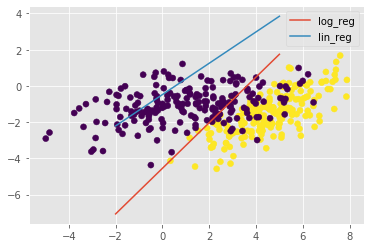

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

model_log = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.01, max_epoch=100, C=100)
model_log.fit(X, y, batch_size = 10)
plot_decision_boundary(model_log)

model_lin = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.01, max_epoch=100, C=10)
model_lin.fit(X, y, batch_size = 10)
plot_decision_boundary(model_lin)

plt.scatter(X[:,0], X[:,1], c=y)

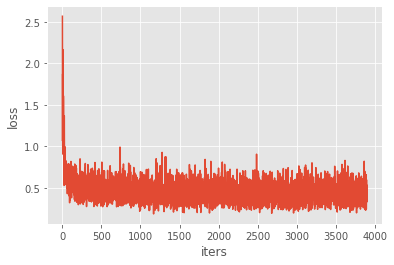

In [10]:
plt.ylabel("loss")
plt.xlabel("iters")
plt.plot(list(range(len(model_log.errors_log['loss']))), model_log.errors_log['loss'])

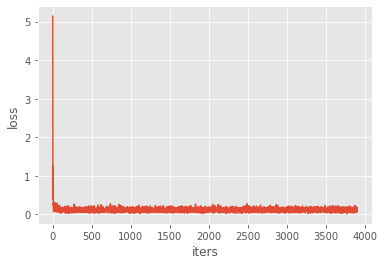

In [11]:
plt.ylabel("loss")
plt.xlabel("iters")
plt.plot(list(range(len(model_lin.errors_log['loss']))), model_lin.errors_log['loss'])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

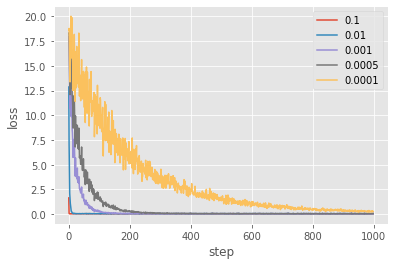

In [14]:
N = 10
alphas = [0.1, 0.01, 0.001, 0.0005, 0.0001]
for alpha in alphas:
    model_lin = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=alpha, max_epoch=1, C=100)
    model_lin.fit(X, y, batch_size=10)
    loss = []
    for i in range(N, len(model_lin.errors_log['loss']), N):
        loss.append(np.mean(model_lin.errors_log['loss'][i - N: i]))       
    plt.plot(range(len(loss)), loss, label=alpha)
plt.xlabel("step")
plt.ylabel("loss")
plt.legend()

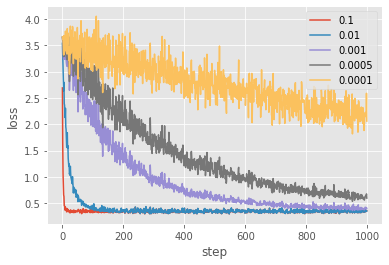

In [15]:
N = 10
alphas = [0.1, 0.01, 0.001, 0.0005, 0.0001]
for alpha in alphas:
    model_lin = MySGDClassifier(batch_generator, model_type='log_reg', alpha=alpha, max_epoch=1, C=10)
    model_lin.fit(X, y, batch_size=10)
    loss = []
    for i in range(N, len(model_lin.errors_log['loss']), N):
        loss.append(np.mean(model_lin.errors_log['loss'][i - N: i]))       
    plt.plot(range(len(loss)), loss, label=alpha)
plt.xlabel("step")
plt.ylabel("loss")
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Оптимальным значением оказалось $\alpha = 0.01$. При больших значениях (>0.5) алгоритм вовсе не сходился. При слишком низких значениях (<0.0001) алгоритм сходится, но очень медленно.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

Text(0.5, 0, 'C')

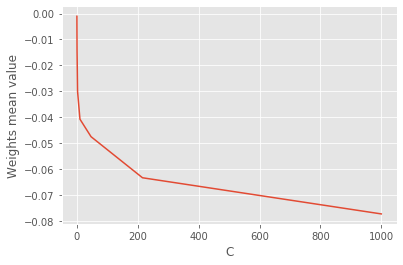

In [16]:
weights = []
for C in np.logspace(3, -3, 10):
    model_lin = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.01, max_epoch=1, C=C)
    model_lin.fit(X, y, batch_size=10)
    weights.append(np.mean(model_lin.weights))
plt.plot(np.logspace(3, -3, 10), weights)
plt.ylabel("Weights mean value")
plt.xlabel("C")

Text(0.5, 0, 'C')

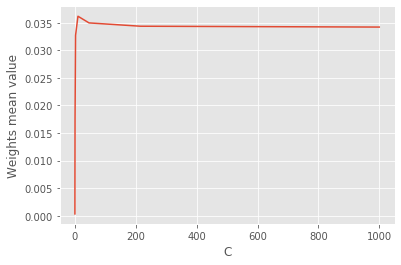

In [17]:
weights = []
for C in np.logspace(3, -3, 10):
    model_lin = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.01, max_epoch=1, C=C)
    model_lin.fit(X, y, batch_size=10)
    weights.append(np.mean(model_lin.weights))
plt.plot(np.logspace(3, -3, 10), weights)
plt.ylabel("Weights mean value")
plt.xlabel("C")

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [18]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [19]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [20]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [21]:
X_train[0]

array([4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1])

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [22]:
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

In [24]:
model_lin = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.01, max_epoch=50, C=100)
model_lin.fit(X_train_scale, y_train, batch_size=10)

y_pred = model_lin.predict(X_train_scale)
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
max_f1_thres = np.argmax(2 * precision * recall / (precision + recall))

print("Linear best:", f1_score(y_train, y_pred > thresholds[max_f1_thres]))

Linear best: 0.6216366158113731


In [25]:
model_lin = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.01, max_epoch=50, C=100)
model_lin.fit(X_train_scale, y_train, batch_size=10)

y_pred = model_lin.predict(X_train_scale)
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
max_f1_thres = np.argmax(2 * precision * recall / (precision + recall))

print("Log best:", f1_score(y_train, y_pred > thresholds[max_f1_thres]))

Log best: 0.6217350115035865


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [26]:
from sklearn.model_selection import train_test_split
X_train_s, X_val, y_train_s, y_val = train_test_split(
    X_train_scale, y_train, test_size=0.25, random_state=1337, stratify=y_train)

In [27]:
# grid = {
#     'model_type' : ['lin_reg', 'log_reg'],
#     'alpha' : [0.1, 0.01, 0.005],
#     'max_epoch' : [1, 10, 50, 100],
#     'C' : [0.01, 0.1, 1, 10, 100],
#     'batch_size' : [10, 30, 50, 100]
# }
# max_score = 0
# best_grid = {}
# for _model_type in grid['model_type']:
#     for _alpha in grid['alpha']:
#         for _max_epoch in grid['max_epoch']:
#             for _C in grid['C']:
#                 for _batch_size in grid['batch_size']:
#                     model = MySGDClassifier(batch_generator, model_type=_model_type, alpha=_alpha, max_epoch=_max_epoch, C=_C)
#                     model.fit(X_train_s, y_train_s, batch_size=_batch_size)
#                     y_pred = model.predict(X_val)
#                     if np.sum(np.isnan(y_pred)):
#                         continue
#                     precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
#                     max_f1_thres = np.nanargmax(2 * precision * recall / (precision + recall))
#                     score = f1_score(y_val, y_pred > thresholds[max_f1_thres])
#                     if score > max_score:
#                         max_score = score
#                         best_grid['model_type'] = _model_type
#                         best_grid['alpha'] = _alpha
#                         best_grid['max_epoch'] = _max_epoch
#                         best_grid['C'] = _C
#                         best_grid['batch_size'] = _batch_size
#                         best_grid['threshold'] = thresholds[max_f1_thres]
#                         print("Score:", score)

In [28]:
best_grid = {
            'model_type': 'log_reg',
            'alpha': 0.1,
            'max_epoch': 100,
            'C': 10,
            'batch_size': 30,
            'threshold': 0.38112116848292595798}
#Score 0.6220254565578306

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Максимизируем f1-меру через precision_recall_curve

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [29]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [30]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scale = scaler.transform(X_test)

In [32]:
model = MySGDClassifier(batch_generator, 
                        model_type=best_grid['model_type'], alpha=best_grid['alpha'],
                        max_epoch=best_grid['max_epoch'], C=best_grid['C'])
model.fit(X_train_scale, y_train, batch_size=best_grid['batch_size'])
y_pred = np.where(model.predict(X_test_scale) > best_grid['threshold'], 1, 0)
df = pd.DataFrame({'pair_id': test_data['pair_id'], 'target': y_pred})
df.to_csv("test.csv", index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***